# Modeling

In [1]:
# Necessary imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, lars_path
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

sns.set(context='notebook', style='whitegrid', font_scale=1.2)


## Data Import & Setup

In [2]:
sf = pd.read_csv('data_files/sf_clean.csv')

# Reformatting hood_district names
sf['hood_district'] = sf['hood_district'].astype(int)
sf['hood_district'] = sf['hood_district'].astype(str)

In [3]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          989 non-null    int64  
 1   sqft           989 non-null    float64
 2   beds           989 non-null    float64
 3   bath           989 non-null    float64
 4   laundry        989 non-null    object 
 5   pets           989 non-null    object 
 6   housing_type   989 non-null    object 
 7   parking        989 non-null    object 
 8   hood_district  989 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 69.7+ KB


In [4]:
sf.head()

,price,sqft,beds,bath,laundry,pets,housing_type,parking,hood_district
0,6800,1600.0,2.0,2.0,(a) in-unit,(d) no pets,(c) multi,(b) protected,7
1,3500,550.0,1.0,1.0,(a) in-unit,(a) both,(c) multi,(b) protected,7
2,5100,1300.0,2.0,1.0,(a) in-unit,(a) both,(c) multi,(d) no parking,7
3,9000,3500.0,3.0,2.5,(a) in-unit,(d) no pets,(c) multi,(b) protected,7
4,3100,561.0,1.0,1.0,(c) no laundry,(a) both,(c) multi,(d) no parking,7


In [5]:
sf.describe()

,price,sqft,beds,bath
count,989.000000,989.000000,989.000000,989.000000
mean,3595.035389,976.765420,1.679474,1.390293
std,1546.222670,474.629798,1.076710,0.562714
min,750.000000,150.000000,0.000000,1.000000
25%,2650.000000,650.000000,1.000000,1.000000
50%,3300.000000,900.000000,2.000000,1.000000
75%,4242.000000,1200.000000,2.000000,2.000000
max,19000.000000,3500.000000,6.000000,4.000000


## Setting up dummy variables

In [6]:
sf2 = sf.copy()

In [7]:
sf2 = pd.get_dummies(sf2)

In [8]:
sf2.head()

,price,sqft,beds,bath,laundry_(a) in-unit,laundry_(b) on-site,laundry_(c) no laundry,pets_(a) both,pets_(b) dogs,pets_(c) cats,...,hood_district_1,hood_district_10,hood_district_2,hood_district_3,hood_district_4,hood_district_5,hood_district_6,hood_district_7,hood_district_8,hood_district_9
0,6800,1600.0,2.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3500,550.0,1.0,1.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,5100,1300.0,2.0,1.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,9000,3500.0,3.0,2.5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,3100,561.0,1.0,1.0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
sf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    989 non-null    int64  
 1   sqft                     989 non-null    float64
 2   beds                     989 non-null    float64
 3   bath                     989 non-null    float64
 4   laundry_(a) in-unit      989 non-null    uint8  
 5   laundry_(b) on-site      989 non-null    uint8  
 6   laundry_(c) no laundry   989 non-null    uint8  
 7   pets_(a) both            989 non-null    uint8  
 8   pets_(b) dogs            989 non-null    uint8  
 9   pets_(c) cats            989 non-null    uint8  
 10  pets_(d) no pets         989 non-null    uint8  
 11  housing_type_(a) single  989 non-null    uint8  
 12  housing_type_(b) double  989 non-null    uint8  
 13  housing_type_(c) multi   989 non-null    uint8  
 14  parking_(a) valet        9

## Setting up Train/Test Splits

### Training vs Testing

In [10]:
X, y = sf2.drop('price',axis=1), sf2['price']

# hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

### Training versus Validation

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=37)

## Linear Regression 

### Score

In [12]:
lin = LinearRegression()

lin.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lin.score(X_val, y_val):.5f}')
print(f'Linear Regression test R^2: {lin.score(X_test, y_test):.5f}')

Linear Regression val R^2: 0.80629
Linear Regression test R^2: 0.78445


### Residuals

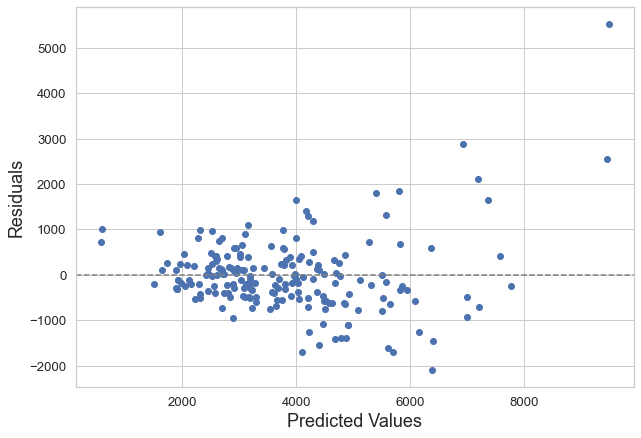

In [13]:
# Using Test Values
lin_prediction = lin.predict(X_test)
lin_residual = (y_test - lin_prediction)

# Use statsmodels to plot the residuals vs the fitted values
plt.figure(figsize=(10, 7))
plt.scatter(lin_prediction, lin_residual)    #change this if working with sklearn

plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Predicted Values', fontsize=18)
plt.ylabel('Residuals', fontsize=18);

## Ridge

### Model Setup: Scaled

In [14]:
#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

rid = Ridge()

### Score

In [15]:
rid.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {rid.score(X_val_scaled, y_val):.5f}')
print(f'Ridge Regression test R^2: {rid.score(X_test_scaled, y_test):.5f}')

Ridge Regression val R^2: 0.80667
Ridge Regression test R^2: 0.78416


### Residuals

In [16]:
# using validation data
rid_prediction = rid.predict(X_test_scaled)
rid_residual = (y_test - rid_prediction)

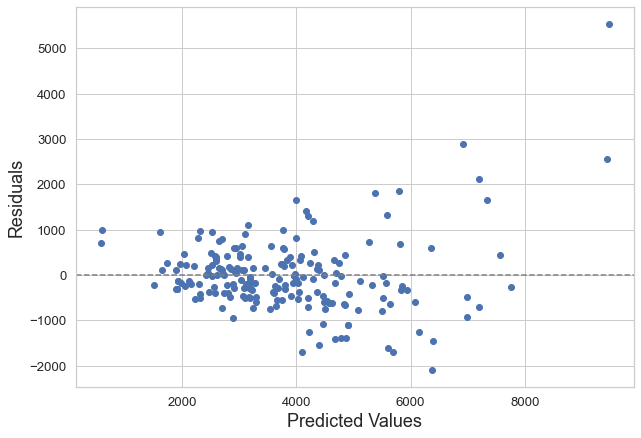

In [17]:
# Use statsmodels to plot the residuals vs the fitted values
plt.figure(figsize=(10, 7))
plt.scatter(rid_prediction, rid_residual)    #change this if working with sklearn

plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Predicted Values', fontsize=18)
plt.ylabel('Residuals', fontsize=18);

## Lasso

### Model Setup:  Scaled

In [18]:
las = Lasso()
las.fit(X_train_scaled, y_train)

Lasso()

### Score

In [19]:
print(f'Lasso Regression val R^2: {las.score(X_val_scaled, y_val):.5f}')
print(f'Lasso Regression test R^2: {las.score(X_test_scaled, y_test):.5f}')

Lasso Regression val R^2: 0.80676
Lasso Regression test R^2: 0.78459


### Residuals

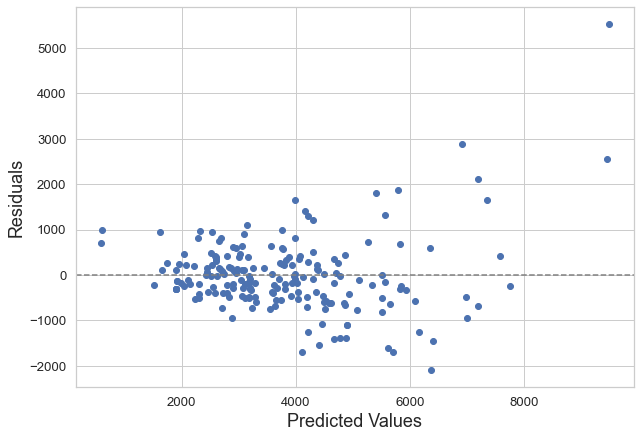

In [20]:
# Using Test Values
las_prediction = las.predict(X_test_scaled)
las_residual = (y_test - las_prediction)

# Use statsmodels to plot the residuals vs the fitted values
plt.figure(figsize=(10, 7))
plt.scatter(las_prediction, las_residual)    #change this if working with sklearn

plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Predicted Values', fontsize=18)
plt.ylabel('Residuals', fontsize=18);

## Comparison

### Validation Data

In [21]:
print(f'Linear Regression val R^2: {lin.score(X_val, y_val):.5f}')
print(f'Ridge Regression val R^2: {rid.score(X_val_scaled, y_val):.5f}')
print(f'Lasso Regression val R^2: {las.score(X_val_scaled, y_val):.5f}')

Linear Regression val R^2: 0.80629
Ridge Regression val R^2: 0.80667
Lasso Regression val R^2: 0.80676


Ridge is best here

### Test Data

In [22]:
print(f'Linear Regression test R^2: {lin.score(X_test, y_test):.5f}')
print(f'Ridge Regression test R^2: {rid.score(X_test_scaled, y_test):.5f}')
print(f'Lasso Regression test R^2: {las.score(X_test_scaled, y_test):.5f}')

Linear Regression test R^2: 0.78445
Ridge Regression test R^2: 0.78416
Lasso Regression test R^2: 0.78459


Lasso is best here

#### Linear Prediction Plot

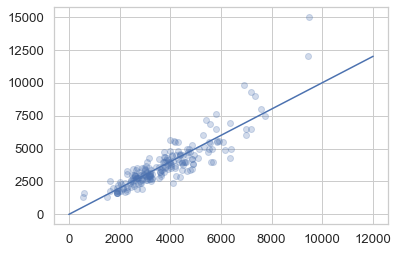

In [23]:
lin_pred = lin.predict(X_test)

plt.scatter(lin_pred, y_test, alpha=.25)
plt.plot(np.linspace(0,12000,100), np.linspace(0,12000,100));

In [24]:
#r-squared
r2_score(y_test, lin_pred)

0.7844534878640871

#### Ridge Prediction Plot

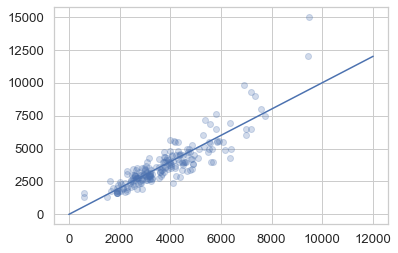

In [25]:
rid_pred = rid.predict(X_test_scaled)

plt.scatter(rid_pred, y_test, alpha=.25)
plt.plot(np.linspace(0,12000,100), np.linspace(0,12000,100));

In [26]:
#r-squared
r2_score(y_test, rid_pred)

0.7841631267719056

#### Lasso Prediction Plot

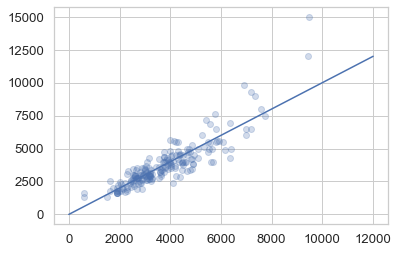

In [27]:
las_pred = las.predict(X_test_scaled)

plt.scatter(las_pred, y_test, alpha=.25)
plt.plot(np.linspace(0,12000,100), np.linspace(0,12000,100));

In [28]:
#r-squared
r2_score(y_test, las_pred)

0.7845943472117095

### Coefficients

In [29]:
lin_coefs = lin.coef_
rid_coefs = rid.coef_
las_coefs = las.coef_

features = sf2.columns[1:]

coef_data = {'Features': features,
             'Linear': lin_coefs,
             'Ridge': rid_coefs,
             'Lasso': las_coefs}

coef_df = pd.DataFrame(coef_data)
coef_df

,Features,Linear,Ridge,Lasso
0,sqft,1.855602,845.005217,849.252471
1,beds,200.350836,216.213978,213.610538
2,bath,368.812883,210.220210,208.218372
3,laundry_(a) in-unit,221.577061,96.422989,153.360760
4,laundry_(b) on-site,-88.037860,-56.681721,-0.000000
5,laundry_(c) no laundry,-133.539201,-58.020254,-16.175836
6,pets_(a) both,-116.699455,-26.968662,-37.011405
7,pets_(b) dogs,177.680014,30.600194,26.891908
8,pets_(c) cats,-23.851903,10.823636,3.044085
9,pets_(d) no pets,-37.128656,11.782862,0.000000


### Cross Validation

In [30]:
sf3 = sf2.copy()

#### K-Folds: Linear / Ridge

In [31]:
X, y = sf3.drop('price',axis=1), sf3['price']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=30)

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [32]:
#run the CV

kf = KFold(n_splits=5, shuffle=True, random_state =12)
cv_lm_r2s, cv_lm_reg_r2s, cv_las_r2s = [], [], []  #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()
    lm_reg = Ridge()
    las = Lasso()

    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))
    
    
    #lasso with feature scaling
    las.fit(X_train_scaled, y_train)
    cv_las_r2s.append(las.score(X_val_scaled, y_val))

print('Simple regression scores: ', cv_lm_r2s)
print('Ridge scores: ', cv_lm_reg_r2s)
print('Lasso scores: ', cv_las_r2s, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.5f} +- {np.std(cv_lm_r2s):.5f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.5f} +- {np.std(cv_lm_reg_r2s):.5f}')
print(f'Lasso mean cv r^2: {np.mean(cv_las_r2s):.5f} +- {np.std(cv_las_r2s):.5f}')

Simple regression scores:  [0.7902121151705257, 0.6782319184707426, 0.6539934339757951, 0.7160366020304075, 0.802466863921923]
Ridge scores:  [0.7899834459296102, 0.678642517816127, 0.6538612147303825, 0.7164974771090393, 0.802480424403826]
Lasso scores:  [0.7905054508998404, 0.67884152872791, 0.6542137240605329, 0.7161378898312363, 0.8027580238591888] 

Simple mean cv r^2: 0.72819 +- 0.05918
Ridge mean cv r^2: 0.72829 +- 0.05908
Lasso mean cv r^2: 0.72849 +- 0.05915


In [33]:
lm.fit(X,y)
print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.5f}')

Linear Regression test R^2: 0.82990


In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

lm_reg = Ridge(alpha=1)
lm_reg.fit(X_scaled,y)
print(f'Ridge Regression test R^2: {lm_reg.score(X_test_scaled, y_test):.5f}')

Ridge Regression test R^2: 0.83016


In [35]:
kf = KFold(n_splits=5, shuffle=True, random_state = 100)

print("Linear: ", np.mean(cross_val_score(lm, X, y, cv=kf, scoring='r2')))
print("Ridge: ", np.mean(cross_val_score(lm_reg, X, y, cv=kf, scoring='r2')))

Linear:  0.7372402072528803
Ridge:  0.7381190435201397


#### Lasso CV

In [36]:
## Scale the data as before
scalar = StandardScaler()

In [37]:
## Scale the Predictors on both the train and test set
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [38]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

lasso_model = LassoCV(cv=kf)
lasso_model.fit(X_train_scaled, y_train)

LassoCV(cv=KFold(n_splits=5, random_state=100, shuffle=True))

In [39]:
best_alpha = lasso_model.alpha_
best_alpha

26.385293846100474

In [40]:
las_model = Lasso(alpha=best_alpha)
las_model.fit(X_train_scaled, y_train)

Lasso(alpha=26.385293846100474)

In [41]:
print("Lasso (val): ", np.mean(cross_val_score(las_model, X_val_scaled, y_val, cv=kf, scoring='r2')))
print("Lasso (test): ", np.mean(cross_val_score(las_model, X_test_scaled, y_test, cv=kf, scoring='r2')))

Lasso (val):  0.7031473877116825
Lasso (test):  0.79811726361053


## LARS Path

In [42]:
X, y = sf3.drop('price',axis=1), sf3['price']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=30)

In [43]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=37)

In [44]:
## Scale the variables
std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [45]:
X_tr = std.transform(X_train.values)

In [46]:
## Note: lars_path takes numpy matrices, not pandas dataframes

print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_tr, y_train.values, method='lasso')

Computing regularization path using the LARS ...


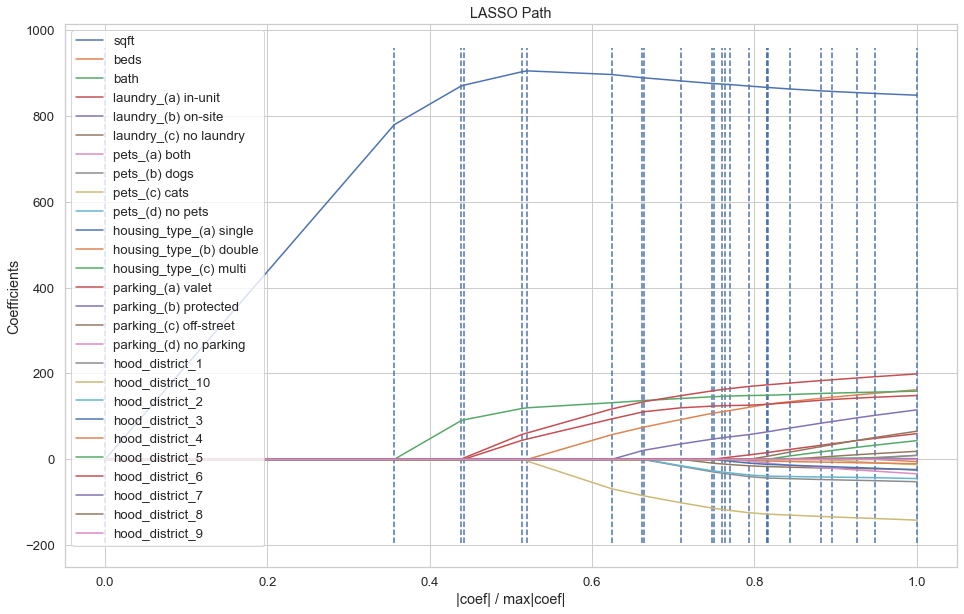

In [47]:
# plotting the LARS path

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(16,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_train.columns)
plt.show()

In [48]:
## Note: lars_path takes numpy matrices, not pandas dataframes

print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_tr, y_train.values, method='ridge')

Computing regularization path using the LARS ...


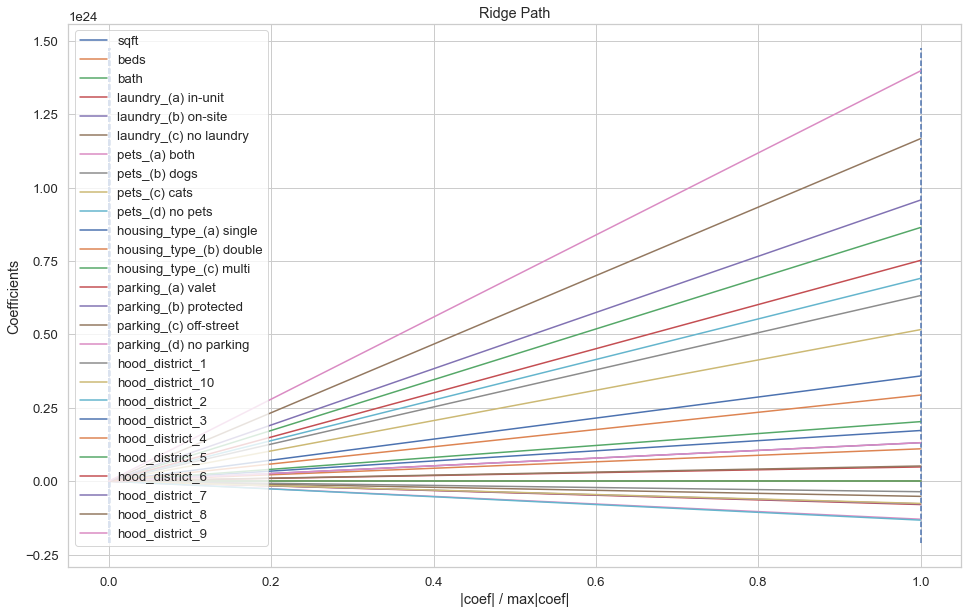

In [49]:
# plotting the LARS path

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(16,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('Ridge Path')
plt.axis('tight')
plt.legend(X_train.columns, loc='upper left')
plt.show()